In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import math

In [23]:
data = pd.read_csv("Housing.csv")
for col in ["mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea"]:
    data[col] = data[col].replace({'yes': 1, 'no': 0})

data = pd.get_dummies(data, columns=["furnishingstatus"], drop_first=False, dtype = int)

C:\Users\Hp\AppData\Local\Temp\ipykernel_18852\3516783939.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({'yes': 1, 'no': 0})


In [25]:
data.dtypes

price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
mainroad                           int64
guestroom                          int64
basement                           int64
hotwaterheating                    int64
airconditioning                    int64
parking                            int64
prefarea                           int64
furnishingstatus_furnished         int32
furnishingstatus_semi-furnished    int32
furnishingstatus_unfurnished       int32
dtype: object

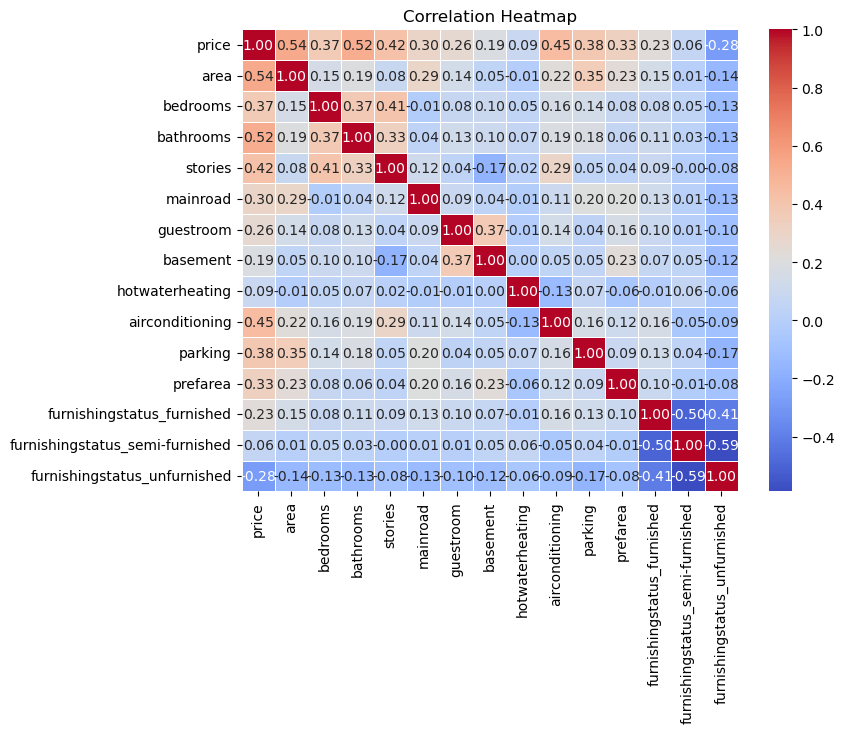

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [28]:
columns = ["price","area", "bedrooms", "bathrooms", "stories"]
price_min = data["price"].min()
price_max = data["price"].max()
area_min = data["area"].min()
area_max = data["area"].max()
bedrooms_min = data["bedrooms"].min()
bedrooms_max = data["bedrooms"].max()
bathrooms_min = data["bathrooms"].min()
bathrooms_max = data["bathrooms"].max()
stories_min = data["stories"].min()
stories_max = data["stories"].max()

#min-max normalization
for col in columns:
    data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

In [29]:
x = data.drop(columns = ["price"]).values
y = data[["price"]].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [33]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

In [39]:
n = x_train.shape[1]

hidden_neurons = 4 #for now we'll assume all hidden layers have same number of neurons
hidden_layers = 2
output_size = 1
learning_rate = 0.0025
iters = 4001

# Initialize weights and biases with small random numbers
np.random.seed(42)

# Input layer to first hidden layer
w1 = np.random.randn(n, hidden_neurons) * 0.01
b1 = np.zeros((1, hidden_neurons))

# First hidden layer to second hidden layer
w2 = np.random.randn(hidden_neurons, hidden_neurons) * 0.01
b2 = np.zeros((1, hidden_neurons))

# Second hidden layer to output layer
w3 = np.random.randn(hidden_neurons, output_size) * 0.01
b3 = np.zeros((1, output_size))

for i in range(iters):
    # Forward pass
    z1 = np.dot(x_train, w1) + b1
    a1 = relu(z1)

    z2 = np.dot(a1, w2) + b2
    a2 = relu(z2)

    z3 = np.dot(a2, w3) + b3
    a3 = z3

    # Compute loss
    loss = np.mean((y_train - a3)**2)

    # Backpropagation
    dz3 = (a3 - y_train)
    dw3 = np.dot(a2.T, dz3) 
    db3 = np.sum(dz3, axis=0, keepdims=True)

    dz2 = np.dot(dz3, w3.T) * relu_derivative(z2)
    dw2 = np.dot(a1.T, dz2) 
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, w2.T) * relu_derivative(z1)
    dw1 = np.dot(x_train.T, dz1) 
    db1 = np.sum(dz1, axis=0, keepdims=True)
    
    # Update weights and biases
    w3 -= learning_rate * dw3
    b3 -= learning_rate * db3

    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2

    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1

    # Print loss every 100 iterations
    if i % 1000 == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}")


# Prediction function
def predict(X):
    z1 = np.dot(X, w1) + b1
    a1 = relu(z1)

    z2 = np.dot(a1, w2) + b2
    a2 = relu(z2)

    z3 = np.dot(a2, w3) + b3
    a3 = z3

    return a3

y_pred = predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

Iteration 0: Loss = 0.0886
Iteration 1000: Loss = 0.0231
Iteration 2000: Loss = 0.0231
Iteration 3000: Loss = 0.0094
Iteration 4000: Loss = 0.0073
MSE: 0.011682101549064459
R2 Score: 0.6916807016340438


## predicting price

In [ ]:
area = float(input("Area (sq ft): "))
bedrooms = int(input("Bedrooms: "))
bathrooms = int(input("Bathrooms: "))
stories = int(input("Stories: "))

mainroad = 1 if input("Main road? (yes/no): ").lower() == "yes" else 0
guestroom = 1 if input("Guestroom? (yes/no): ").lower() == "yes" else 0
basement = 1 if input("Basement? (yes/no): ").lower() == "yes" else 0
hotwaterheating = 1 if input("Hot water heating? (yes/no): ").lower() == "yes" else 0
airconditioning = 1 if input("Air conditioning? (yes/no): ").lower() == "yes" else 0
parking = int(input("Parking spaces: "))
prefarea = 1 if input("Preferred area? (yes/no): ").lower() == "yes" else 0

furnishing = input("Furnishing (furnished / semi-furnished / unfurnished): ").lower()
furnished = 1 if furnishing == "furnished" else 0
semi_furnished = 1 if furnishing == "semi-furnished" else 0
unfurnished = 1 if furnishing == "unfurnished" else 0

# Normalize numerical features using training data
area = (area - area_min) / (area_max - area_min)
bedrooms = (bedrooms - bedrooms_min) / (bedrooms_max - bedrooms_min)
bathrooms = (bathrooms - bathrooms_min) / (bathrooms_max - bathrooms_min)
stories = (stories - stories_min) / (stories_max - stories_min)

user_input = np.array([[area, bedrooms, bathrooms, stories,
                        mainroad, guestroom, basement,
                        hotwaterheating, airconditioning, parking, prefarea, furnished,
                        semi_furnished, unfurnished]])

cost = predict(user_input)
print(cost)
cost = cost[0][0]*(price_max - price_min) + price_min
print(f"The estimated cost of the house is: {cost} dollars") 

In [ ]:
user = [7420,4,2,3,1,0,0,0,1,2,1,1,0,0]
cost = predict(user)

In [ ]:
data.head()

In [ ]:
data.head()

In [ ]:
print("User input shape:", user_input.shape)
print("x_train shape:", x_train.shape)
print("Raw prediction:", cost)